In [1]:
# Load extensions
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Importeren van bibliotheken
import math
import numpy as np
import matplotlib.pyplot as plt

from berekeningen_ramses import Brug

# Zoeken van meest ideale parameters voor brug
## Exploratie van formules
### Probleemstelling
Berekeningen gaan uit van volgende situatie:
![Berekeningen](figures/berekeningen_andreas2.0.svg)

In [3]:
brug = Brug(3, 0.3, 2, 2, 1, 1, 3)
brug.__dict__

{'h1': 3,
 'h2': 0.3,
 'd1a': 2,
 'd2a': 2,
 'd1b': 1,
 'd2b': 1,
 'N': 3,
 'cosa': 0.8320502943378437,
 'sina': 0.5547001962252291,
 'cosb': 0.997785157856609,
 'sinb': 0.06651901052377393}

In [4]:
brug.calc_reactie_krachten()

[102.825, 338.98333333333335, 272.31666666666666, 205.65, 102.825]

In [5]:
brug.calc_touw_kracht()

([206.83753366879048, 166.15951927894034, 125.48150488909022],
 [248.03719509122362, 199.2565873737894, 150.47597965635518])

In [6]:
brug.calc_kant()

(-347.0669230769231,
 -414.7592307692308,
 (172.0992307692308, 195.51937642442616, 233.46097732159154),
 -49.91006637168141,
 -596.445796460177,
 (247.4878318584071, 199.80686897217214, 153.11611052222017))

### Wegdek

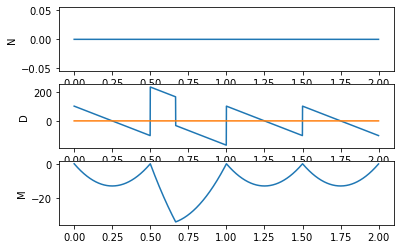

In [11]:
x = np.arange(0, 2, 0.001)
N, D, M = list(zip(*[brug.calc_intern_wegdek(xi) for xi in x]))

plt.figure()
ax1 = plt.subplot(3,1,1)
ax1.plot(x, N)
ax1.set_ylabel("N")
ax2 = plt.subplot(3,1,2, sharex=ax1)
ax2.plot(x, D)
ax2.set_ylabel("D")
ax2.plot(x, [0]*len(x))
ax3 = plt.subplot(3,1,3, sharex=ax1)
ax3.plot(x, [-m for m in M])
ax3.set_ylabel("M")
plt.savefig("figs/wegdek-ramses")

### Piloon 1

In [ ]:
x = np.arange(0, brug.h1, 0.001)
N, D, M = list(zip(*[brug.calc_intern_balk(xi, True) for xi in x]))

plt.figure()
ax1 = plt.subplot(3,1,1)
ax1.plot(x, N)
ax1.plot(x, [0]*len(x))
ax1.set_ylabel("N")
ax2 = plt.subplot(3,1,2)
ax2.plot(x, D)
ax2.set_ylabel("D")
ax3 = plt.subplot(3,1,3)
ax3.plot(x, M)
ax3.set_ylabel("M")

### Piloon 2

In [ ]:
x = np.arange(0, brug.h2, 0.001)
N, D, M = list(zip(*[brug.calc_intern_balk(xi, False) for xi in x]))

plt.figure()
ax1 = plt.subplot(3,1,1)
ax1.plot(x, N)
ax1.plot(x, [0]*len(x))
ax1.set_ylabel("N")
ax2 = plt.subplot(3,1,2)
ax2.plot(x, D)
ax2.set_ylabel("D")
ax3 = plt.subplot(3,1,3)
ax3.plot(x, M)
ax3.set_ylabel("M")